In [5]:
#Basic libraries
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Valuation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#DeepLearning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [7]:
fashion_train = pd.read_csv('fashion-mnist_train.csv')
fashion_test = pd.read_csv('fashion-mnist_test.csv')

In [10]:
fashion_train.shape

(60000, 785)

In [20]:
X_train_fashion=fashion_train.drop('label',axis=1)
y_train_fashion =fashion_train['label']
X_test_fashion= fashion_test.drop('label',axis=1)
y_test_fashion=fashion_test['label']

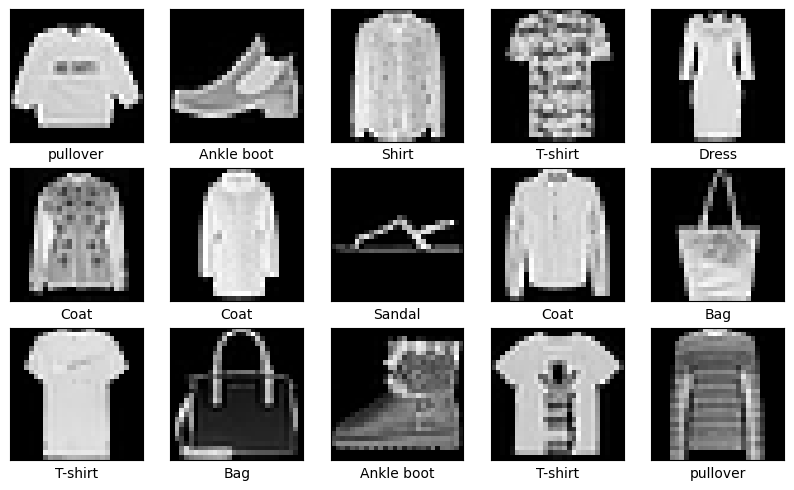

In [21]:
#Input

x_train_reshape=X_train_fashion.values.reshape(-1,28,28) #convert into 28*28 for visualizing as images
x_test_reshape=X_train_fashion.values.reshape(-1,28,28)
#Names of clothing accessories in order
col_names=['T-shirt','Trouser','pullover','Dress','Coat','Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Visualizingthe images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()


In [22]:
#output -- for ANN, Output should be in the categorical order

y_train_fashion=to_categorical(y_train_fashion, num_classes=10)
y_test_fashion=to_categorical(y_test_fashion, num_classes=10)

In [23]:
#creating base neural network
model = keras.Sequential([layers.Dense(128, activation='relu', input_shape=(784,)),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(24, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(24, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(10, activation='softmax'),
                         ])
#compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#fitting the model
history=model.fit(X_train_fashion,y_train_fashion,batch_size=100,epochs=30, validation_data=(X_test_fashion,y_test_fashion))
              
                          
                          

C:\Users\abina\Anac\envs\virt\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5277 - loss: 1.3998 - val_accuracy: 0.8226 - val_loss: 0.5333
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7385 - loss: 0.7712 - val_accuracy: 0.8429 - val_loss: 0.4642
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7620 - loss: 0.6919 - val_accuracy: 0.8408 - val_loss: 0.4585
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7797 - loss: 0.6463 - val_accuracy: 0.8473 - val_loss: 0.4510
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7888 - loss: 0.6206 - val_accuracy: 0.8571 - val_loss: 0.4244
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7979 - loss: 0.6026 - val_accuracy: 0.8625 - val_loss: 0.4219
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7996 - loss: 0.5927 - val_accuracy: 0.8437 - val_loss: 0.4412
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7983 - loss: 0.5910 - val_accuracy: 0

In [24]:
test_loss_fashion,test_acc_fashion=model.evaluate(X_test_fashion,y_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8701 - loss: 0.3710


In [25]:
print('Fashion MNIST test accuracy:',round(test_acc_fashion,4))

Fashion MNIST test accuracy: 0.8703


In [26]:
#predicting the labels fashion
y_predict_fashion=model.predict(X_test_fashion)
y_predict_fashion=np.argmax(y_predict_fashion,axis=1)
y_test_fashion_eval=np.argmax(y_test_fashion,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


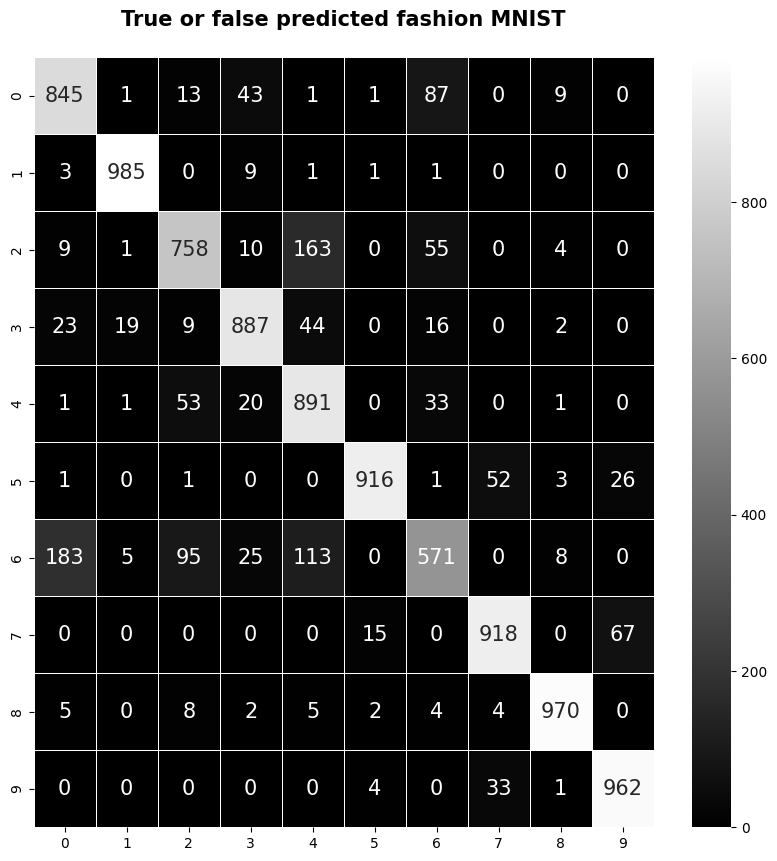

In [31]:
con_mat=confusion_matrix(y_test_fashion_eval, y_predict_fashion)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5, fmt='d',cmap='gray')
plt.title('True or false predicted fashion MNIST\n', fontweight='bold', fontsize=15)
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fashion_eval, y_predict_fashion))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      1000
           1       0.97      0.98      0.98      1000
           2       0.81      0.76      0.78      1000
           3       0.89      0.89      0.89      1000
           4       0.73      0.89      0.80      1000
           5       0.98      0.92      0.94      1000
           6       0.74      0.57      0.65      1000
           7       0.91      0.92      0.91      1000
           8       0.97      0.97      0.97      1000
           9       0.91      0.96      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [33]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


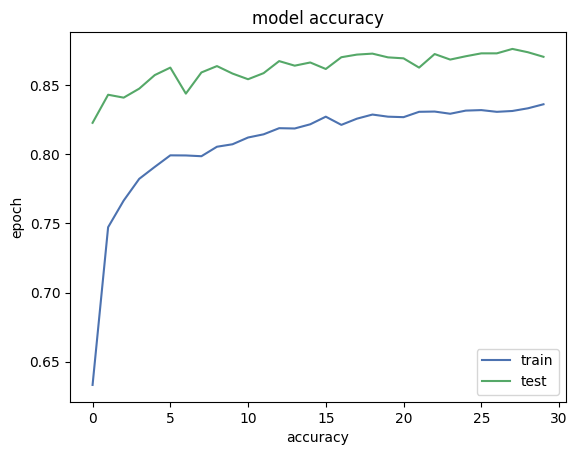

In [34]:
#summarize histroy for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

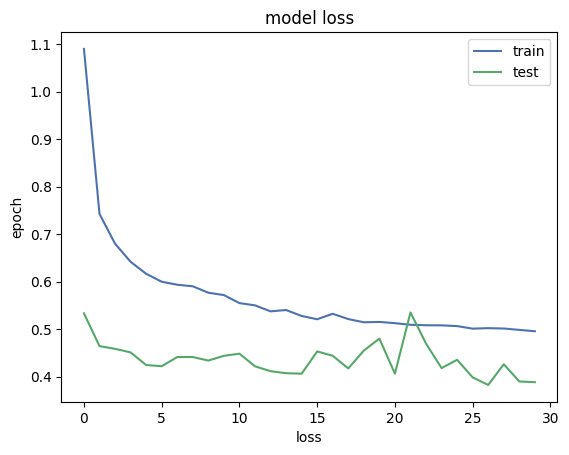

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'], loc='best')
plt.show()

In [36]:
#tf.expand_dims(X_test_digit[0])
y_predict= model.predict(X_test_fashion.loc[[0],:].values)
y_predict=np.argmax(y_predict,axis=1)
y_test_digit_eval=np.argmax(y_test_fashion, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


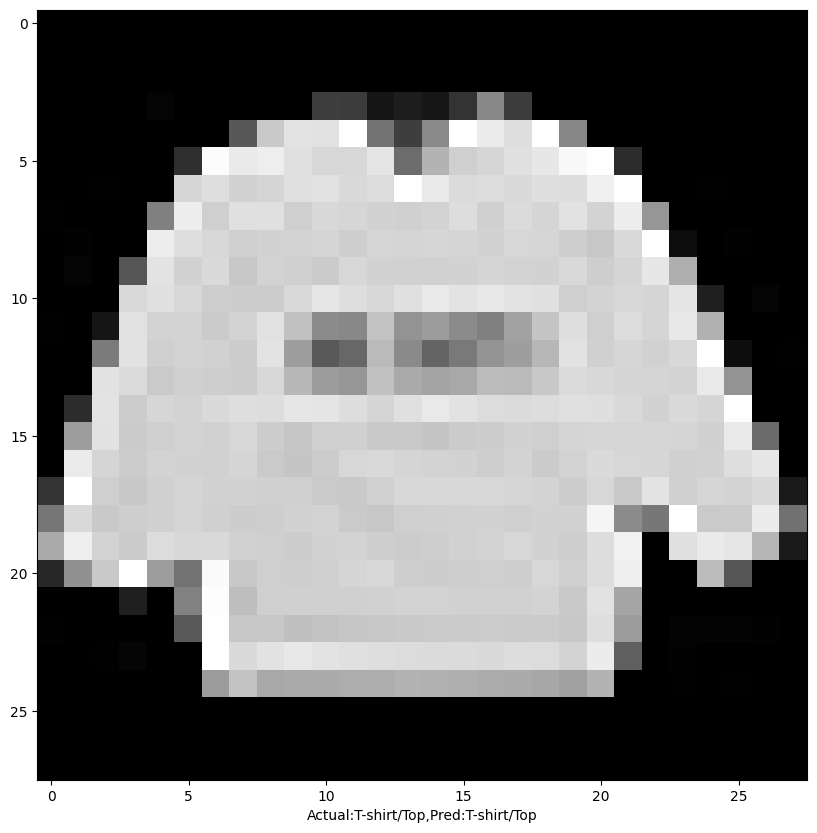

In [38]:
#Names of clothing accessories in order
col_names= ['T-shirt/Top', 'Trouser', 'pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#visualizing the images
plt.figure(figsize=(10,10))
plt.imshow(x_train_reshape[0], cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_fashion[0])],col_names[y_predict[0]]))
plt.show()